# Self Organizing Maps (SOM)
### Dataset: [A3-data.txt](../../input/A3-data.txt)



<a id="1"></a>
## Import modules

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AffinityPropagation
import matplotlib as mpl
from minisom import MiniSom


<a id="2"></a>
## Loading dataset

In [8]:
filename = '../../input/A3-data.txt'
df = pd.read_csv(filename, delimiter=',', header=0)

dataset_1 = df.to_numpy()

dataset_1[:, :-1] = (dataset_1[:, :-1] - np.mean(dataset_1[:, :-1], axis=0)) / np.std(dataset_1[:, :-1], axis=0)

print(dataset_1.shape)
print(np.min(dataset_1, axis=0))

(360, 5)
[-2.25620249 -2.16568552 -2.11316192 -2.30227955  1.        ]


<a id="3"></a>
## Standardize the data

 [ 5000 / 5000 ] 100% - 0:00:00 left 
 quantization error: 0.3812296192159205
 [ 5000 / 5000 ] 100% - 0:00:00 left 
 quantization error: 0.20542249857455117
 [ 5000 / 5000 ] 100% - 0:00:00 left 
 quantization error: 0.560060385019751
 [ 5000 / 5000 ] 100% - 0:00:00 left 
 quantization error: 0.4114541457343237
 [ 5000 / 5000 ] 100% - 0:00:00 left 
 quantization error: 0.3626176651691468
 [ 5000 / 5000 ] 100% - 0:00:00 left 
 quantization error: 0.5726314103886586
Best Parameters Found:
{'sigma': 1.0, 'learning_rate': 0.5, 'neighborhood_function': 'gaussian', 'topology': 'rectangular'}
Quantization Error: 0.20542249857455117
Topographic Error: 0.1388888888888889
 [ 5000 / 5000 ] 100% - 0:00:00 left 
 quantization error: 0.20542249857455117


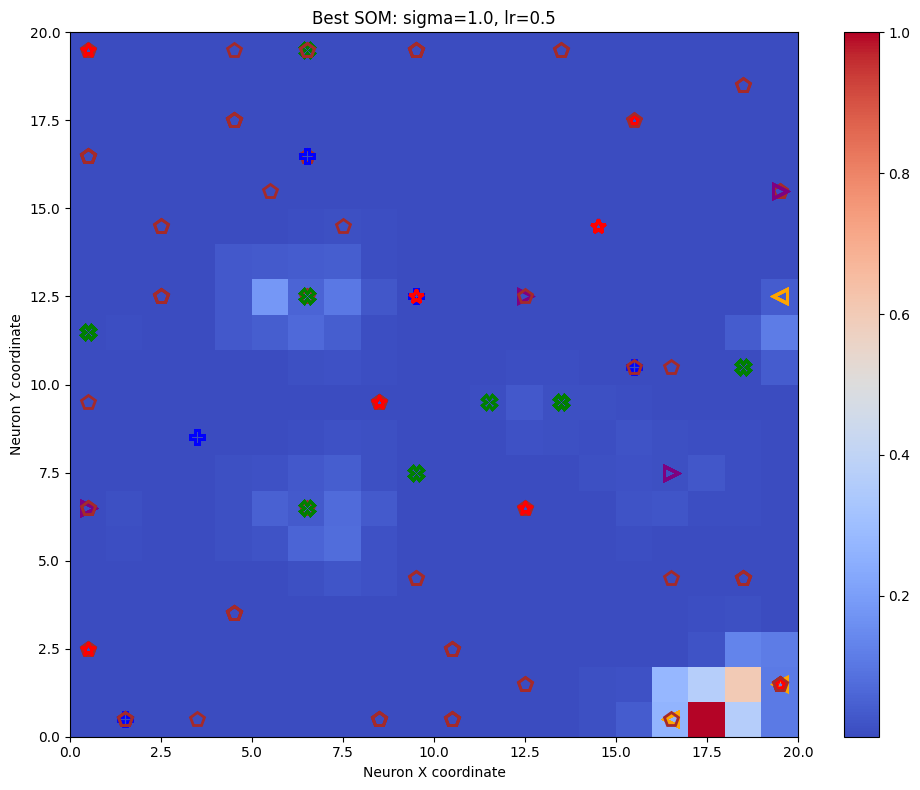

In [9]:

# prepare the data
training_data = dataset_1[:, :-1]
target = np.array(dataset_1[:, -1], dtype=np.uint8)

# define SOM parameters to try
parameters_to_try = [
    {"sigma": 0.5, "learning_rate": 0.5, "neighborhood_function": "gaussian", "topology": "rectangular"},
    {"sigma": 1.0, "learning_rate": 0.5, "neighborhood_function": "gaussian", "topology": "rectangular"},
    {"sigma": 0.5, "learning_rate": 0.1, "neighborhood_function": "gaussian", "topology": "rectangular"},
    {"sigma": 1.0, "learning_rate": 0.1, "neighborhood_function": "gaussian", "topology": "hexagonal"},
    {"sigma": 0.5, "learning_rate": 0.3, "neighborhood_function": "mexican_hat", "topology": "rectangular"},
    {"sigma": 1.0, "learning_rate": 0.3, "neighborhood_function": "mexican_hat", "topology": "hexagonal"},
    # additional parameter sets can be defined here
]

# function to evaluate SOM
def evaluate_som(som, data):
    quantization_error = som.quantization_error(data)
    topographic_error = som.topographic_error(data)
    return quantization_error, topographic_error

# results holder
results = []

for params in parameters_to_try:
    # initialize SOM with current parameters
    som = MiniSom(20, 20, training_data.shape[1], random_seed=42, **params)
    som.pca_weights_init(training_data)
    som.train(training_data, 5000, verbose=True)

    # evaluate this SOM configuration
    q_error, t_error = evaluate_som(som, training_data)
    results.append((params, q_error, t_error))

# identifying the best parameter set based on the lowest quantization error (or another criterion)
best_params, best_q_error, best_t_error = min(results, key=lambda x: x[1])

print("Best Parameters Found:")
print(best_params)
print("Quantization Error:", best_q_error)
print("Topographic Error:", best_t_error)

# visualization for the best SOM
best_som = MiniSom(20, 20, training_data.shape[1], random_seed=42, **best_params)
best_som.pca_weights_init(training_data)
best_som.train(training_data, 5000, verbose=True)

# visualization code (for the best SOM)
plt.figure(figsize=(10, 8))
plt.pcolor(som.distance_map().T, cmap='coolwarm')
plt.colorbar()

markers = ['*', 'X', 'P', '>', '<', 'p', 'H']
colors = ['red', 'green', 'blue', 'purple', 'orange', 'brown', 'pink']
for cnt, xx in enumerate(training_data):
    w = som.winner(xx)
    plt.plot(w[0]+.5, w[1]+.5, markers[target[cnt]-1], markerfacecolor='None',
             markeredgecolor=colors[target[cnt]-1], markersize=10, markeredgewidth=2)

plt.title(f'Best SOM: sigma={best_params["sigma"]}, lr={best_params["learning_rate"]}')
plt.xlabel('Neuron X coordinate')
plt.ylabel('Neuron Y coordinate')
plt.tight_layout()
plt.show()





### Component Planes


This plot shows the SOM's distance map, often visualized as a heatmap. The distance map represents the distances between neighboring neurons' weights, giving an idea of how similar or different adjacent neurons are.
Superimposed on this map are the data points, where each point's position corresponds to the neuron to which it is most similar (its "winning" neuron).
The points are colored based on their class labels, offering a visual representation of how different classes are distributed across the map.

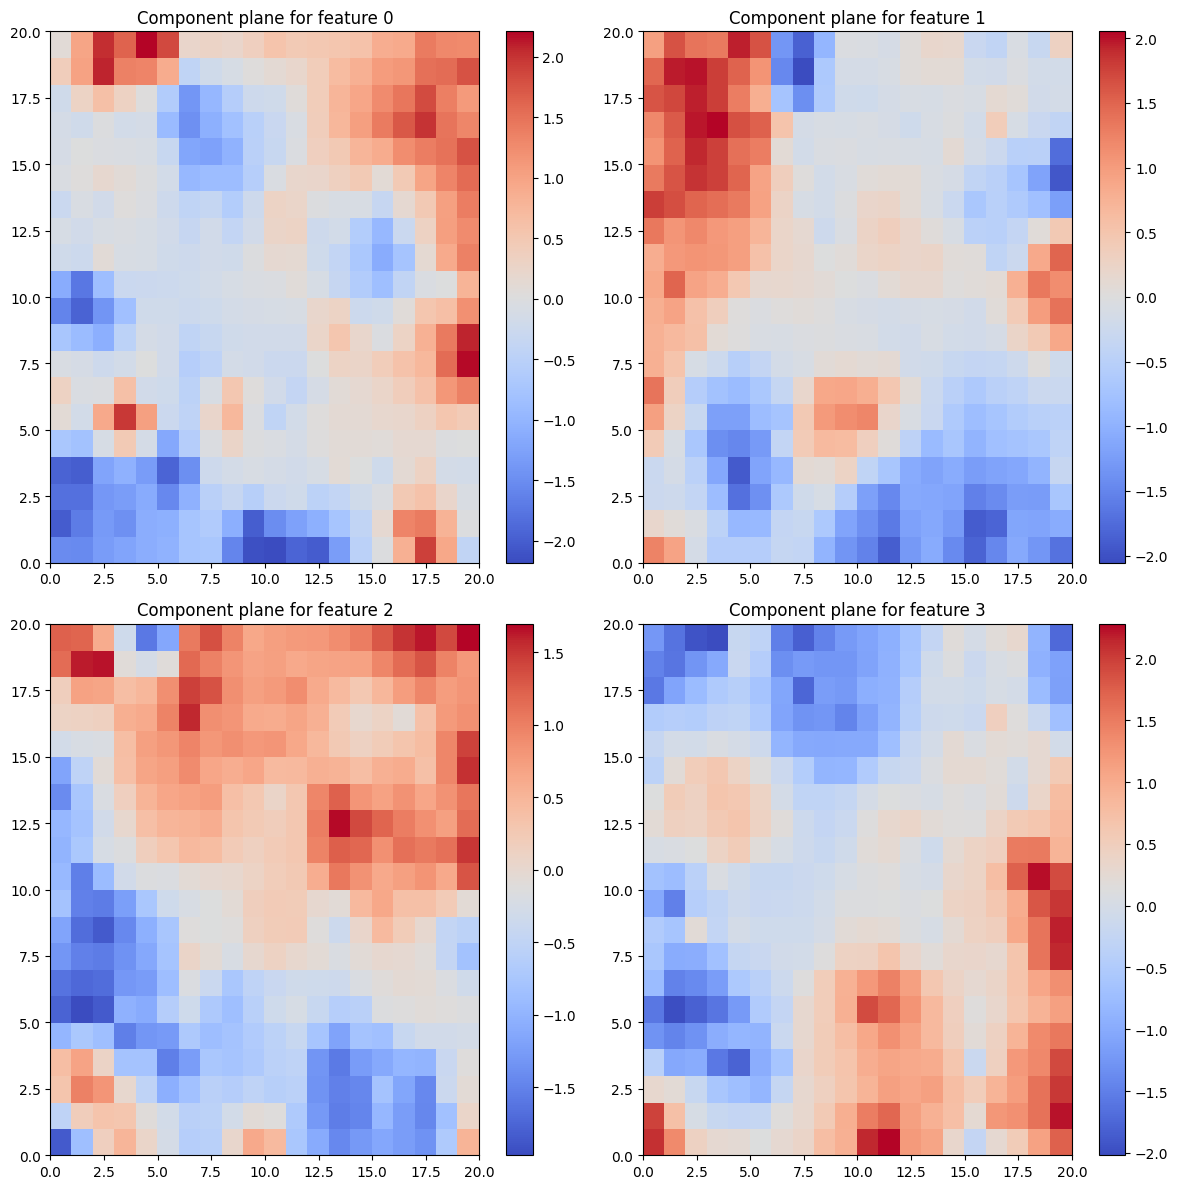

In [10]:
# plot the component planes for all features
num_features = training_data.shape[1]
plt.figure(figsize=(num_features*3, num_features*3))
for i in range(num_features):
    plt.subplot((num_features+1)//2, 2, i+1)  # adjust the layout based on the number of features
    plt.title(f'Component plane for feature {i}')
    plt.pcolor(best_som.get_weights()[:, :, i], cmap='coolwarm')  # plotting the component plane for each feature
    plt.colorbar()
plt.tight_layout()
plt.show()


The neuron weight components give a detailed view of what each neuron has learned about the input features, while the first plot shows how these learned features collectively organize the input data (with class labels) on the map. Understanding both helps in comprehensively interpreting the results of the SOM.